In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [109]:
def imshow(u):
    if(u.shape[-1]==2):
        u=torch.cat((u,u[:,:,[0]]*0),dim=2)
    plt.imshow(u)
    plt.show()

In [119]:
gridCount=torch.tensor([256,256])
index=torch.stack(torch.meshgrid(torch.arange(gridCount[0]),torch.arange(gridCount[1]),indexing='ij'),dim=2)
uv=(index+.5)/gridCount
cellSize=torch.tensor([1,1])
timeStep=.1


In [120]:
def bilinear(t,i):
    gridCount=t.shape
    x,y=i[:,:,0],i[:,:,1]
    fx=torch.clamp(torch.floor(x).type(torch.LongTensor),0,gridCount[0]-1)
    fy=torch.clamp(torch.floor(y).type(torch.LongTensor),0,gridCount[1]-1)
    cx=torch.clamp(torch.ceil(x).type(torch.LongTensor),0,gridCount[0]-1)
    cy=torch.clamp(torch.ceil(y).type(torch.LongTensor),0,gridCount[1]-1)
    tx,ty=x-fx,y-fy
    rtval=0
    for ix,itx in ((fx,1-tx),(cx,tx)):
        for iy,ity in ((fy,1-ty),(cy,ty)):
            rtval+=t[ix,iy]*itx*ity
    return rtval

In [121]:
def advect(q,u,timeStep_=None):
    if timeStep_ is None: timeStep_=timeStep
    return bilinear(q,index+u*timeStep_/cellSize)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


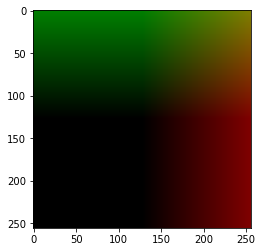

RuntimeError: The size of tensor a (2) must match the size of tensor b (256) at non-singleton dimension 2

In [122]:
u=torch.stack([uv[:,:,1]-.5,-(uv[:,:,0]-.5)],dim=2)
imshow(u)
u=advect(u,u)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


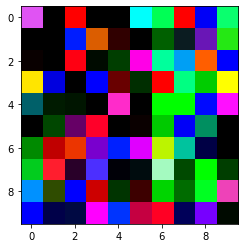

In [104]:
plt.imshow(torch.randn((10,10,3)))